<center><H1> Machine Learning Lab #11

<H3>  Data Clustering - Hierarchial

In [1]:
#Generic Imports

import math
import io
import re
import inspect
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from scipy.sparse import csr_matrix
import seaborn as sns

In [2]:
#Problem specific Import

from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform

<H2>Questions

1. For the following 1-dimensional data points apply agglomerative hierarchical clustering to build the dendrogram.
Construct the proximity matrix (distance matrix). Merge the clusters using the single linkage (min distance) and update
the proximity matrix accordingly. Clearly show the proximity matrix corresponding to each iteration of the algorithm.

18, 22, 25, 27, 42, 43

3. Consider the above-mentioned data set in Q no 1 and apply the hierarchical data-clustering algorithm, to identify the
clusters. Write a Python function (without using the scikit-learn library) to do the following:

a. Plot a scatter graph of given data points.

b. Display the proximity matrix using Euclidean distance, Manhattan distance, and Minkowski distance.

c. Plot the dendrogram for single, complete and average linkage methods.


In [3]:
pts = [18,22,25,27,42,43]
labs = [chr(65+i) for i in range(len(pts))]
clusters = [[p] for p in pts]

def d(a,b): return min(abs(x-y) for x in a for y in b)

In [4]:
def print_mat(cl, lb):
    n=len(cl)
    hdr="   "+" ".join(f"{x:>6}" for x in lb)
    print(hdr)
    for i in range(n):
        row=[]
        for j in range(n):
            row.append("-" if i==j else str(d(cl[i],cl[j])))
        print(f"{lb[i]:>2} "+" ".join(f"{x:>6}" for x in row))
    print()

In [5]:
print("Initial proximity matrix")
print_mat(clusters, labs)

while len(clusters)>1:
    n=len(clusters)
    mi=1e9
    ai=aj=0
    for i in range(n):
        for j in range(i+1,n):
            dij=d(clusters[i],clusters[j])
            if dij<mi:
                mi,dij,ai,aj = dij,dij,i,j
    labs[ai]=f"{{{labs[ai]},{labs[aj]}}}"
    clusters[ai]=clusters[ai]+clusters[aj]
    del clusters[aj]; del labs[aj]
    print(f"Merge {ai} and {aj} at distance {mi}")
    print_mat(clusters, labs)

Initial proximity matrix
        A      B      C      D      E      F
 A      -      4      7      9     24     25
 B      4      -      3      5     20     21
 C      7      3      -      2     17     18
 D      9      5      2      -     15     16
 E     24     20     17     15      -      1
 F     25     21     18     16      1      -

Merge 4 and 5 at distance 1
        A      B      C      D  {E,F}
 A      -      4      7      9     24
 B      4      -      3      5     20
 C      7      3      -      2     17
 D      9      5      2      -     15
{E,F}     24     20     17     15      -

Merge 2 and 3 at distance 2
        A      B  {C,D}  {E,F}
 A      -      4      7     24
 B      4      -      3     20
{C,D}      7      3      -     15
{E,F}     24     20     15      -

Merge 1 and 2 at distance 3
        A {B,{C,D}}  {E,F}
 A      -      4     24
{B,{C,D}}      4      -     15
{E,F}     24     15      -

Merge 0 and 1 at distance 4
   {A,{B,{C,D}}}  {E,F}
{A,{B,{C,D}}}      

Q3 section:

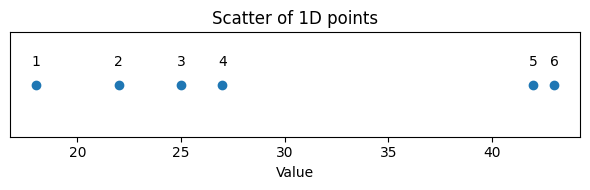

Euclidean distance matrix
       1    2    3    4    5    6
  1    0    4    7    9   24   25
  2    4    0    3    5   20   21
  3    7    3    0    2   17   18
  4    9    5    2    0   15   16
  5   24   20   17   15    0    1
  6   25   21   18   16    1    0

Manhattan distance matrix
       1    2    3    4    5    6
  1    0    4    7    9   24   25
  2    4    0    3    5   20   21
  3    7    3    0    2   17   18
  4    9    5    2    0   15   16
  5   24   20   17   15    0    1
  6   25   21   18   16    1    0

Minkowski distance matrix (p=3)
       1    2    3    4    5    6
  1    0 4.00 7.00 9.00 24.00 25.00
  2 4.00    0    3 5.00 20.00 21.00
  3 7.00    3    0    2 17.00 18.00
  4 9.00 5.00    2    0 15.00 16.00
  5 24.00 20.00 17.00 15.00    0    1
  6 25.00 21.00 18.00 16.00    1    0



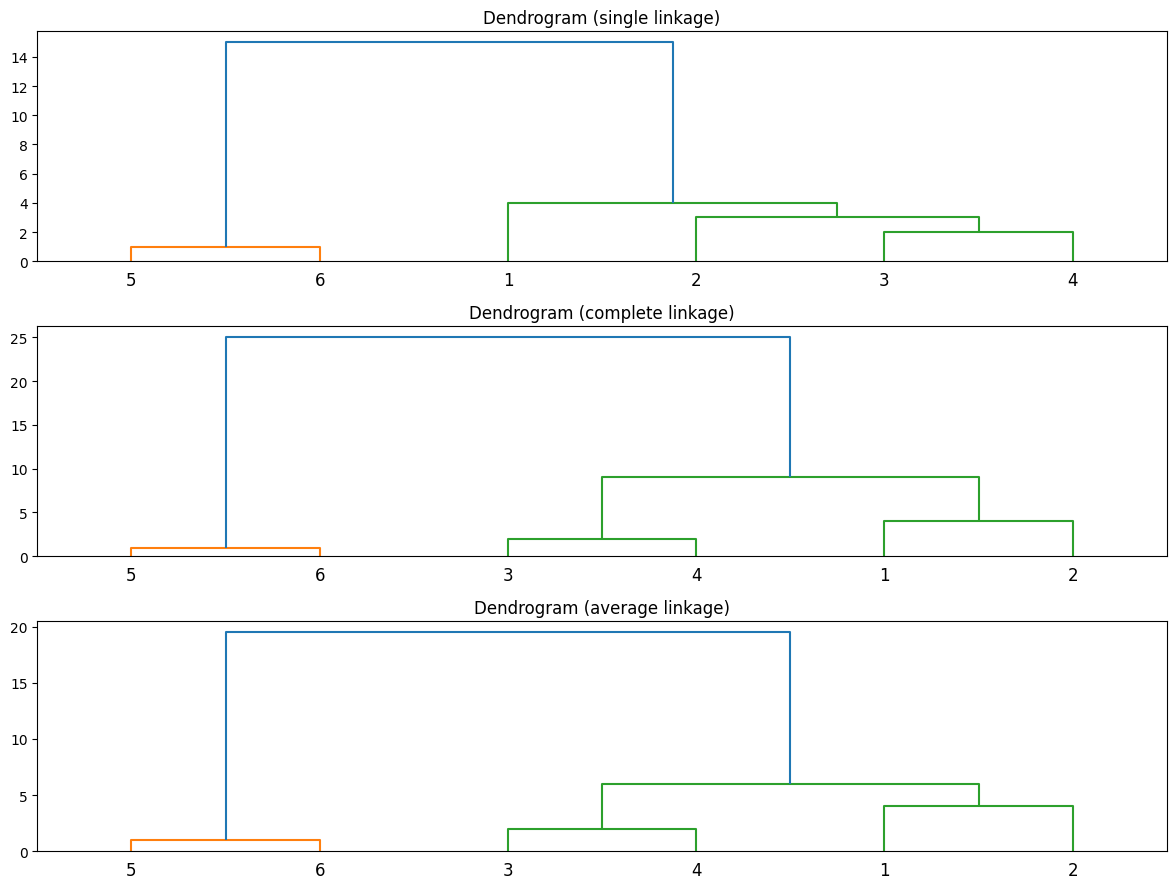

In [6]:
pts = np.array([18,22,25,27,42,43])

def plot_scatter(x):
    plt.figure(figsize=(6,2))
    plt.scatter(x, np.zeros_like(x), c='C0')
    for i,v in enumerate(x): plt.text(v,0.02,str(i+1),ha='center')
    plt.yticks([]); plt.xlabel('Value'); plt.title('Scatter of 1D points'); plt.tight_layout(); plt.show()

def distance_matrices(x, p_mink=3):
    x = np.atleast_1d(x).reshape(-1,1)
    eu = squareform(pdist(x, metric='euclidean'))
    man = squareform(pdist(x, metric='cityblock'))
    mink = squareform(pdist(x, metric='minkowski', p=p_mink))
    return eu, man, mink

def print_matrix(mat, name):
    n = mat.shape[0]
    hdr = "    " + " ".join(f"{i+1:>4}" for i in range(n))
    print(name); print(hdr)
    for i,row in enumerate(mat):
        print(f"{i+1:>3} " + " ".join(f"{val:4.0f}" if val==int(val) else f"{val:4.2f}" for val in row))
    print()

def plot_dendrograms(x, method_list=('single','complete','average')):
    X = np.atleast_1d(x).reshape(-1,1)
    plt.figure(figsize=(12, 3*len(method_list)))
    for k,method in enumerate(method_list,1):
        Z = linkage(X, method=method, metric='euclidean')
        ax = plt.subplot(len(method_list),1,k)
        dendrogram(Z, labels=[str(i+1) for i in range(len(X))], orientation='top')
        ax.set_title(f'Dendrogram ({method} linkage)')
    plt.tight_layout(); plt.show()

# Example run for given dataset
if __name__ == "__main__":
    plot_scatter(pts)
    eu, man, mink = distance_matrices(pts, p_mink=3)
    print_matrix(eu, "Euclidean distance matrix")
    print_matrix(man, "Manhattan distance matrix")
    print_matrix(mink, "Minkowski distance matrix (p=3)")
    plot_dendrograms(pts, ('single','complete','average'))

2. Consider the following data set and apply the hierarchical data-clustering algorithm, to identify the clusters. Solve it
manually by considering all linkage functions (Single, Complete and Average) using Euclidean distance.

| Point | x | y |
|-------|---:|---:|
| P₁ | 1 | 1 |
| P₂ | 3 | 2 |
| P₃ | 9 | 1 |
| P₄ | 3 | 7 |
| P₅ | 7 | 2 |
| P₆ | 9 | 7 |
| P₇ | 4 | 8 |
| P₈ | 8 | 3 |
| P₉ | 1 | 4 |

In [12]:
pts = np.array([[1,1],[3,2],[9,1],[3,7],[7,2],[9,7],[4,8],[8,3],[1,4]])
labels = [f"P{i+1}" for i in range(len(pts))]


In [13]:
def euclid(a,b): return np.linalg.norm(a-b)

def agglomerative(X, linkage):
    n = len(X)
    clusters = [[i] for i in range(n)]
    ids = list(range(n))
    next_id = n
    Z = []
    def clust_dist(a,b):
        pairs = [(X[i],X[j]) for i in a for j in b]
        ds = [euclid(u,v) for u,v in pairs]
        if linkage == 'single': return min(ds)
        if linkage == 'complete': return max(ds)
        return sum(ds)/len(ds)
    while len(clusters) > 1:
        i0=j0=None; best=1e9
        for i in range(len(clusters)):
            for j in range(i+1,len(clusters)):
                d = clust_dist(clusters[i],clusters[j])
                if d < best:
                    best, i0, j0 = d, i, j
        a,b = clusters[i0], clusters[j0]
        ia, ib = ids[i0], ids[j0]
        Z.append([ia, ib, best, len(a)+len(b)])
        clusters[i0] = a + b
        ids[i0] = next_id
        del clusters[j0]; del ids[j0]
        next_id += 1
    return np.array(Z)

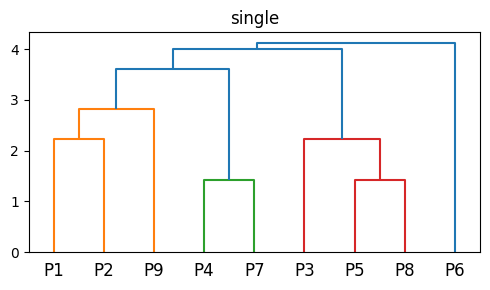

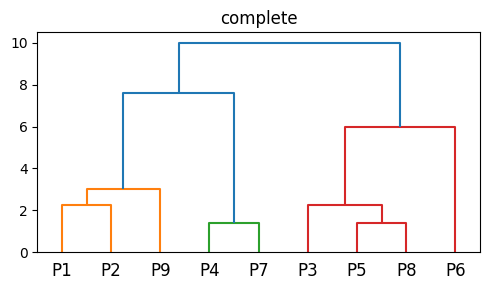

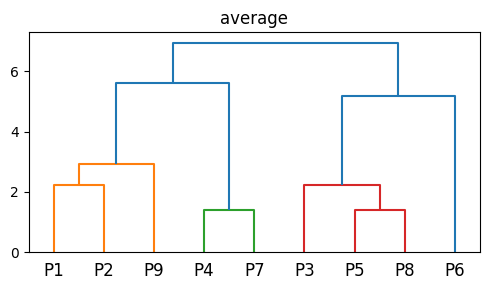

In [14]:
for method in ('single','complete','average'):
    Z = agglomerative(pts, method)
    plt.figure(figsize=(5,3))
    dendrogram(Z, labels=labels)
    plt.title(method); plt.tight_layout()
plt.show()

---